In [5]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad, tplquad
from scipy.special import roots_legendre
import math

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Juan Jose Bustamante Guiral
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






Integral 1 con quad = 1.5920977078586793
Integral 2 con quad = 0.2725138805025834


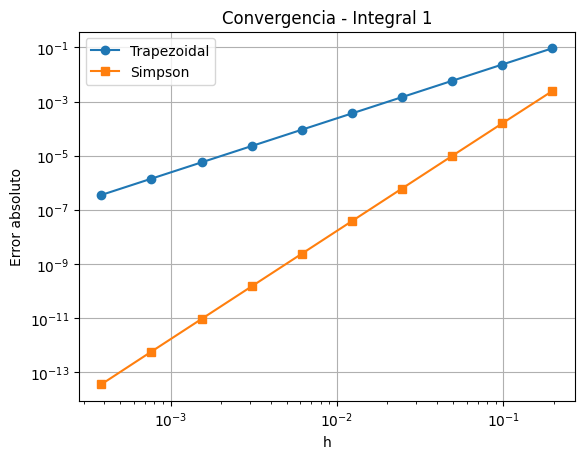

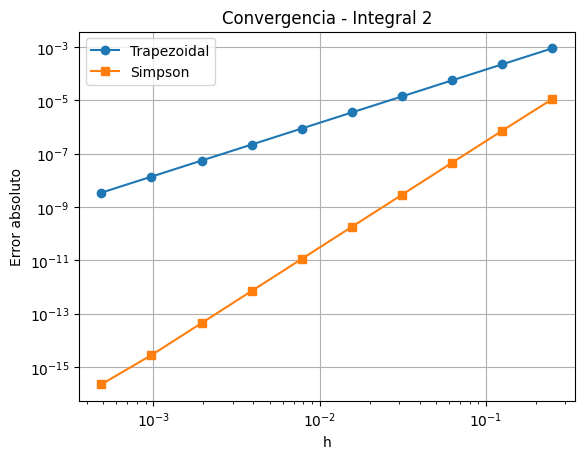

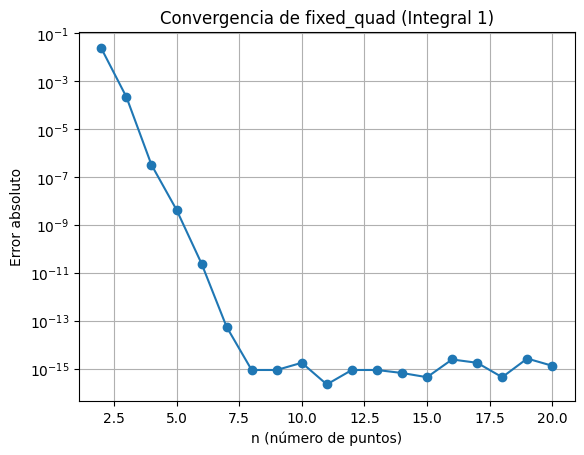

In [8]:

f1 = lambda x: np.exp(3*x) * np.sin(x)
I1_quad, _ = quad(f1, 0, np.pi/4)
print(f'Integral 1 con quad = {I1_quad}')


f2 = lambda x: 1 / (x * np.log(x))
I2_quad, _ = quad(f2, np.e, 1 + np.e)
print(f'Integral 2 con quad = {I2_quad}')


def calcular_errores(f, a, b, I_exacto, nombre):
    N_val = 2**np.arange(2, 12)
    h_val = (b - a) / N_val
    errores_trap = []
    errores_simp = []

    for N in N_val:
        x = np.linspace(a, b, N + 1)
        y = f(x)

        trap = np.trapezoid(y, x)
        simp = simpson(y, x)

        errores_trap.append(abs(I_exacto - trap))
        errores_simp.append(abs(I_exacto - simp))

    # Gráfico log-log
    plt.figure()
    plt.loglog(h_val, errores_trap, 'o-', label='Trapezoidal')
    plt.loglog(h_val, errores_simp, 's-', label='Simpson')
    plt.xlabel('h')
    plt.ylabel('Error absoluto')
    plt.title(f'Convergencia - {nombre}')
    plt.legend()
    plt.grid()
    plt.show()

# Aplicamos para ambas integrales
calcular_errores(f1, 0, np.pi/4, I1_quad, 'Integral 1')
calcular_errores(f2, np.e, 1 + np.e, I2_quad, 'Integral 2')

# fixed_quad

n_val = np.arange(2, 21)
errores_fixed = []

for n in n_val:
    I_fixed, _ = fixed_quad(f1, 0, np.pi/4, n=n)
    error = abs(I1_quad - I_fixed)
    errores_fixed.append(error)

plt.figure()
plt.plot(n_val, errores_fixed, 'o-')
plt.yscale('log')
plt.xlabel('n (número de puntos)')
plt.ylabel('Error absoluto')
plt.title('Convergencia de fixed_quad (Integral 1)')
plt.grid()
plt.show()


#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [11]:
f3 = lambda z, y, x: (1/y) * np.sin(z/y)

resultado_tplquad, _ = tplquad(f3, 0, np.pi,
                               lambda x: 0, lambda x: x,
                               lambda x, y: 0, lambda x, y: x*y)

print("Resultado de la integral triple con tplquad:", resultado_tplquad)

Resultado de la integral triple con tplquad: 6.934802200544679


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [20]:
def gauss_quad(func, a, b, n):
    """
    Calcula la integral de una función en el intervalo [a, b]
    usando cuadratura gaussiana con n puntos.

    Parameters:
    - func: función a integrar
    - a, b: extremos del intervalo
    - n: número de puntos (grado de cuadratura)

    Returns:
    - Aproximación de la integral
    """
    # Raíces y pesos en [-1, 1]
    x, w = roots_legendre(n)

    # Transformar al intervalo [a, b]
    x_i = 0.5 * (b - a) * x + 0.5 * (a + b)
    w_i = 0.5 * (b - a) * w

    return np.sum(w_i * func(x_i))

# Número de puntos para cada integración
n = 10

# Integrando más interno
def integrando_z(z, y):
    return (1 / y) * np.sin(z / y)

# Integral interna en z
def integral_en_y(x):
    def f_y(y):
        def f_z(z): return integrando_z(z, y)
        return gauss_quad(f_z, 0, x * y, n)
    return gauss_quad(f_y, 0, x, n)

# Integral externa en x
resultado = gauss_quad(integral_en_y, 0, np.pi, n)

print("Resultado aproximado con Gauss cuadratura:", resultado)

Resultado aproximado con Gauss cuadratura: 4.934802200520707


#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [8]:
def trapecio(f, a, b, tol):
    N = 4
    error = 1
    I_anterior = 0

    while error > tol:
        x = np.linspace(a, b, N + 1)
        y = f(x)
        I_nuevo = np.trapz(y, x)
        error = abs(I_nuevo - I_anterior)
        I_anterior = I_nuevo
        N *= 2

    return I_nuevo

def simpson(f, a, b, tol):
    N = 4
    error = 1
    I_anterior = 0

    while error > tol:
        if N % 2 == 1:
            N += 1  # Simpson necesita N par
        x = np.linspace(a, b, N + 1)
        y = f(x)
        h = (b - a) / N
        I_nuevo = h / 3 * (y[0] + 4 * sum(y[1:-1:2]) + 2 * sum(y[2:-2:2]) + y[-1])
        error = abs(I_nuevo - I_anterior)
        I_anterior = I_nuevo
        N *= 2

    return I_nuevo


def cuadratura_gaussiana(f, a, b, n):
    x, w = roots_legendre(n)
    x_trans = 0.5 * (b - a) * x + 0.5 * (a + b)
    w_trans = 0.5 * (b - a) * w
    return np.sum(w_trans * f(x_trans))

# INTEGRAL 1
f1 = lambda x: 1 / np.sqrt(np.tan(x))
a1 = 0
b1 = np.pi / 2 - 1e-8  # evitar tan(pi/2) = ∞

i1_trap = trapecio(f1, a1, b1, 1e-5)
i1_simp = simpson(f1, a1, b1, 1e-5)
i1_gauss = cuadratura_gaussiana(f1, a1, b1, 30)

# INTEGRAL 2
f2 = lambda x: np.cos(x) / x**3
i2_quad, _ = quad(f2, 1, np.inf)

# INTEGRAL 3
# Evaluamos parte interior analíticamente: ∫₀^{sin(x)} 1/√(1 - y²) dy = arcsin(sin(x)) = x
# Entonces: ∫₀^{π/4} x dx = (π/4)² / 2
f3 = lambda x: x
a3 = 0
b3 = np.pi / 4

i3_trap = trapecio(f3, a3, b3, 1e-5)
i3_simp = simpson(f3, a3, b3, 1e-5)
i3_gauss = cuadratura_gaussiana(f3, a3, b3, 20)


print('INTEGRAL 1')
print(f'Trapecio : {i1_trap}')
print(f'Simpson  : {i1_simp}')
print(f'Gauss    : {i1_gauss}')

print('INTEGRAL 2')
print(f'Resultado con quad : {i2_quad}')

print('INTEGRAL 3')
print(f'Trapecio : {i3_trap}')
print(f'Simpson  : {i3_simp}')
print(f'Gauss    : {i3_gauss}')


INTEGRAL 1
Trapecio : inf
Simpson  : inf
Gauss    : 2.1856693156362836
INTEGRAL 2
Resultado con quad : 0.01811792007976691
INTEGRAL 3
Trapecio : 0.30842513753404244
Simpson  : 0.30842513753404244
Gauss    : 0.3084251375340423


/tmp/ipython-input-8-3439647577.py:42: RuntimeWarning: divide by zero encountered in divide
  f1 = lambda x: 1 / np.sqrt(np.tan(x))
/tmp/ipython-input-8-3439647577.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  I_nuevo = np.trapz(y, x)
/tmp/ipython-input-8-3439647577.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  error = abs(I_nuevo - I_anterior)
/tmp/ipython-input-8-3439647577.py:28: RuntimeWarning: invalid value encountered in scalar subtract
  error = abs(I_nuevo - I_anterior)
/tmp/ipython-input-8-3439647577.py:52: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval a